In [24]:
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('../data/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/kaggle/IN_category_id.json
../data/kaggle/MXvideos.csv
../data/kaggle/RU_category_id.json
../data/kaggle/JP_category_id.json
../data/kaggle/FR_category_id.json
../data/kaggle/INvideos.csv
../data/kaggle/GB_category_id.json
../data/kaggle/DEvideos.csv
../data/kaggle/JPvideos.csv
../data/kaggle/ReadMe.md
../data/kaggle/KR_category_id.json
../data/kaggle/KRvideos.csv
../data/kaggle/CAvideos.csv
../data/kaggle/MX_category_id.json
../data/kaggle/RUvideos.csv
../data/kaggle/FRvideos.csv
../data/kaggle/CA_category_id.json
../data/kaggle/US_category_id.json
../data/kaggle/DE_category_id.json
../data/kaggle/USvideos.csv
../data/kaggle/GBvideos.csv
../data/kaggle/.ipynb_checkpoints/ReadMe-checkpoint.md


In [11]:
df=pd.read_csv("../data/kaggle/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [10]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [12]:
print(df.nunique())

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [14]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

<AxesSubplot:>

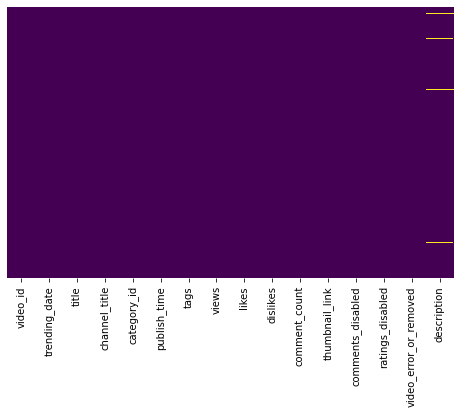

In [23]:
'''
    Missing data observed in description column.
    Let us see the samething visually.
'''
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
# df_cat = json.loads("../data/kaggle/US_category_id.json")
# read json file for category names
with open('../data/kaggle/US_category_id.json', 'r') as f:
    data = json.load(f)
data 

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [62]:
data.items()

dict_items([('kind', 'youtube#videoCategoryListResponse'), ('etag', '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"'), ('items', [{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}

In [71]:
df_cat = pd.DataFrame()
lst_cat_id = []
for cat in data['items']:
    lst_cat_id.append(cat['id'])
lst_cat_id

['1',
 '2',
 '10',
 '15',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44']

In [72]:
lst_cat_name = []
for name in data['items']:
    lst_cat_name.append(name['snippet']['title'])
lst_cat_name

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

In [77]:
df_cat['category_id'] = lst_cat_id
df_cat['catogory_name'] = lst_cat_name

In [75]:
df_cat

,category_id,catogory_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [79]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    32 non-null     object
 1   catogory_name  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [81]:
# Change category_id to int
df_cat['category_id']=df_cat.category_id.astype(int)

In [82]:
df_cat

,category_id,catogory_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [86]:
df = pd.merge(df, df_cat, on=['category_id'])
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,catogory_name_x,catogory_name_y,catogory_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,People & Blogs,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,People & Blogs,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,People & Blogs,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,People & Blogs,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,People & Blogs,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,Shows,Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,Shows,Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,Shows,Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,Shows,Shows


## Descriptive Analysis

### Top 10 categories

<AxesSubplot:xlabel='catogory_name'>

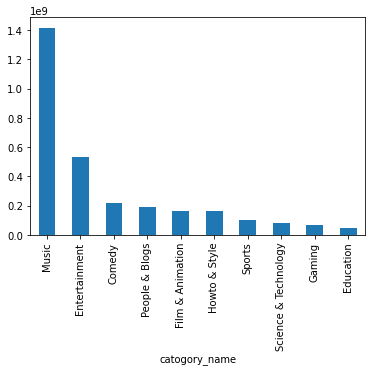

In [117]:
df.groupby('catogory_name').likes.sum().nlargest(10).plot.bar(x='Category')

### Top 10 most liked videos

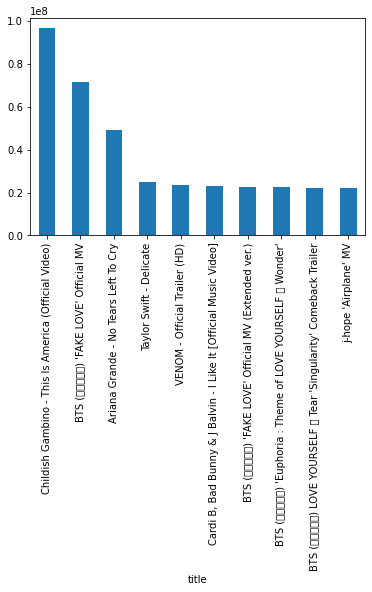

In [119]:
df.groupby('title').likes.sum().nlargest(10).plot.bar(x='Category');

### Top 10 least liked videos

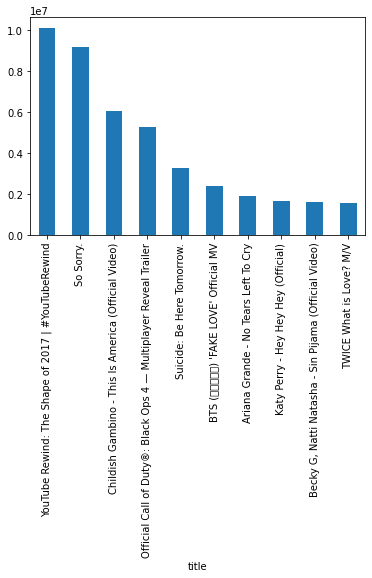

In [121]:
df.groupby('title').dislikes.sum().nlargest(10).plot.bar(x='Category');

### Top 10 videos with most comments

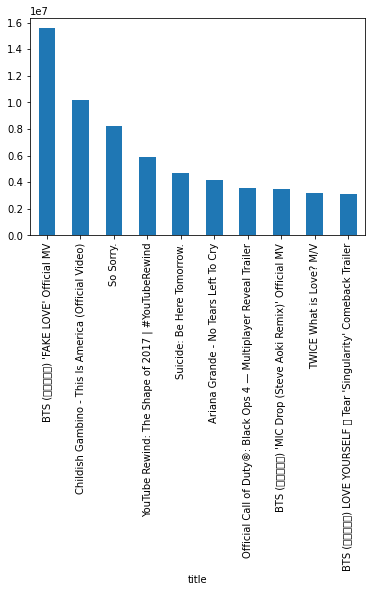

In [122]:
df.groupby('title').comment_count.sum().nlargest(10).plot.bar(x='Category');

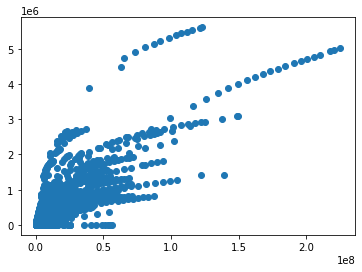

In [123]:
plt.scatter(df.views, df.likes)

In [124]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


<AxesSubplot:>

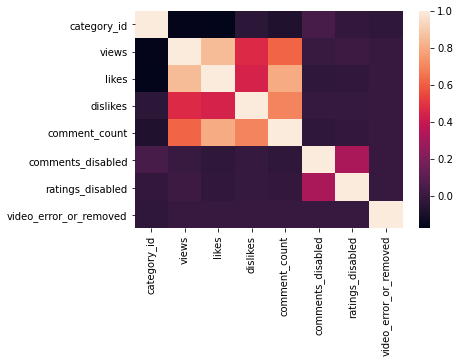

In [125]:
sns.heatmap(df.corr())

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lalithap

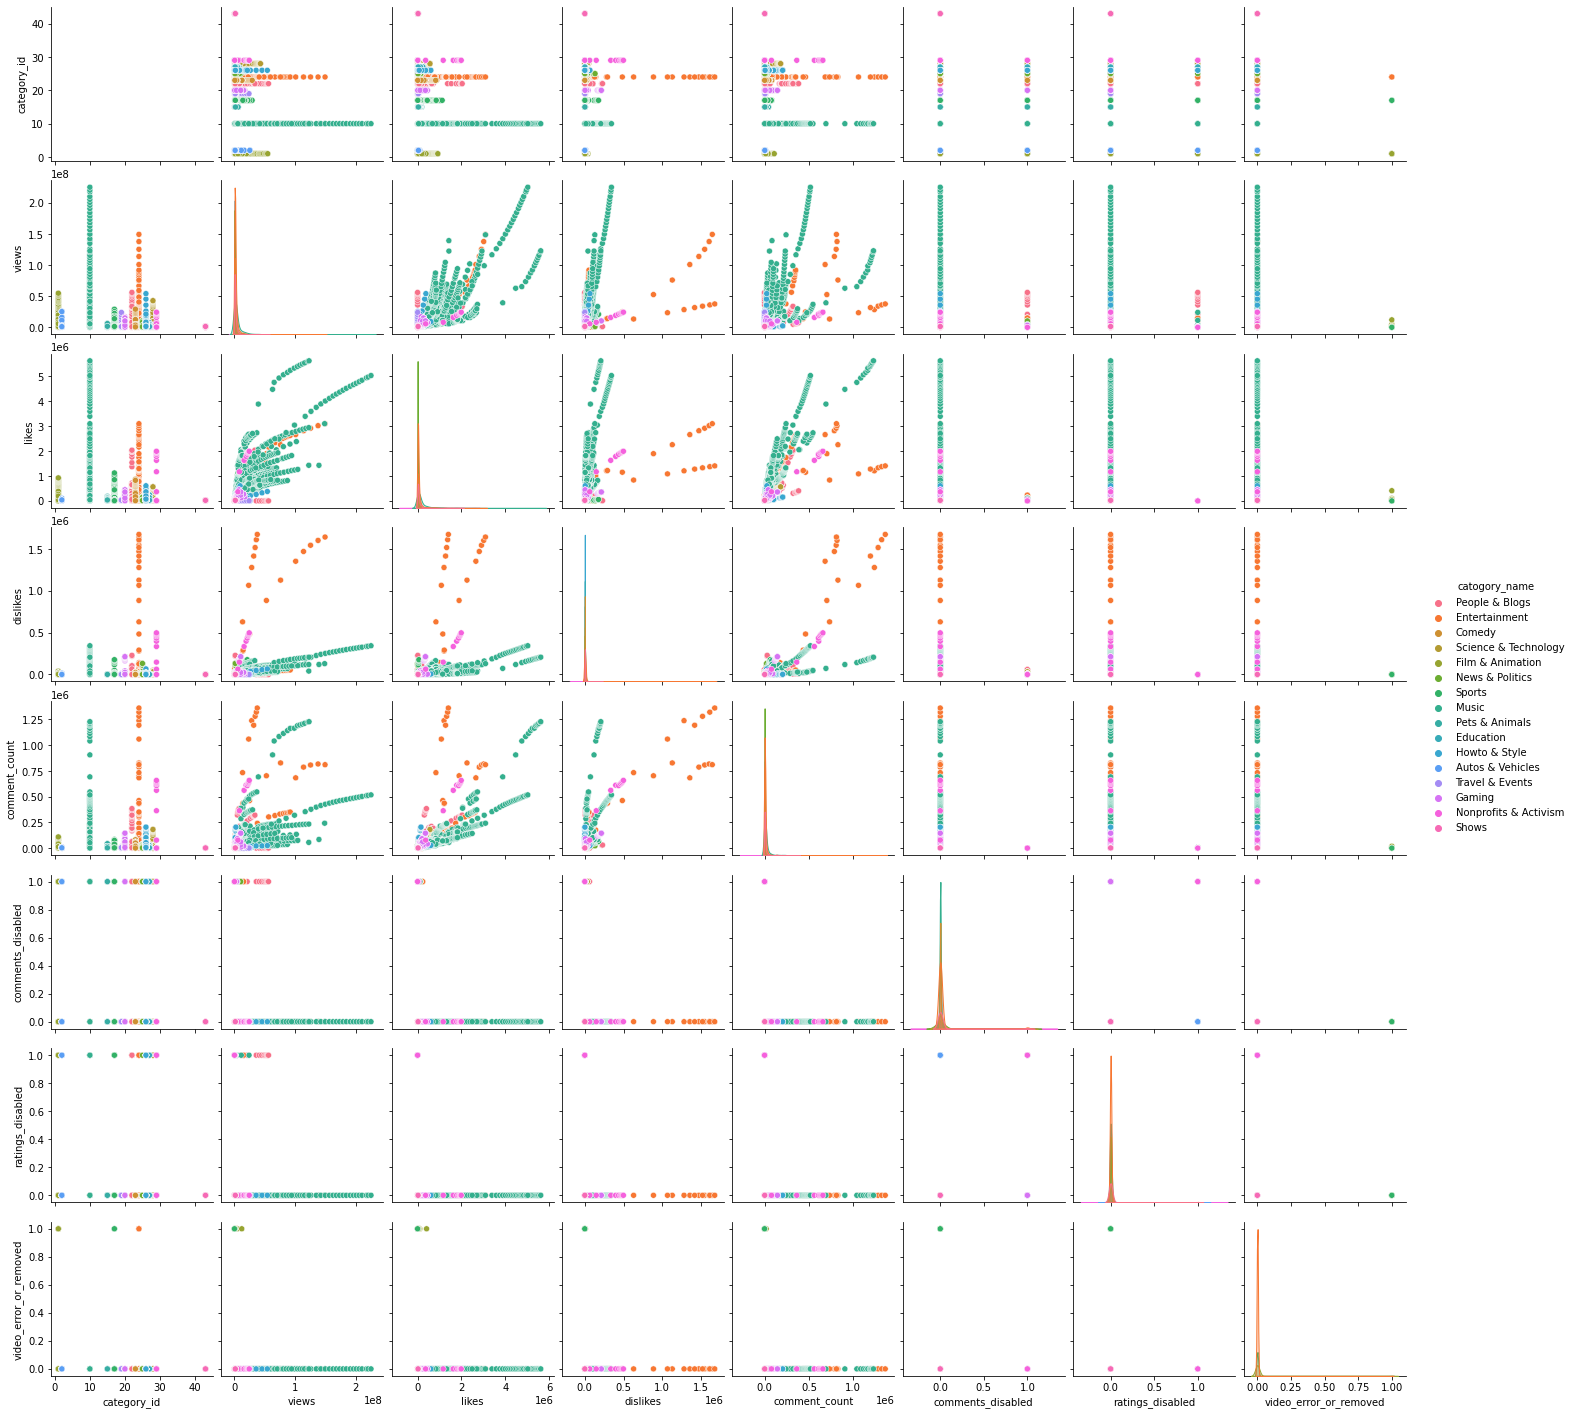

In [129]:
sns.pairplot(df, hue='catogory_name');

### Word cloud in the title & tags

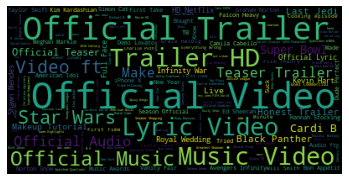

In [137]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud().generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

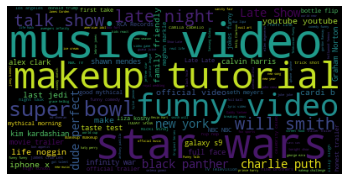

In [138]:
wordcloud = WordCloud().generate(' '.join(df['tags']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [139]:
df[['views', 'likes', 'dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


<AxesSubplot:>

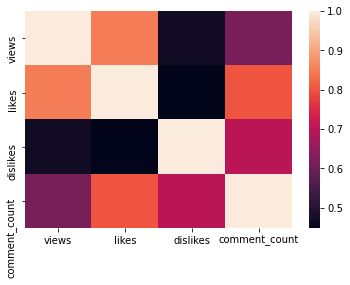

In [140]:
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr())

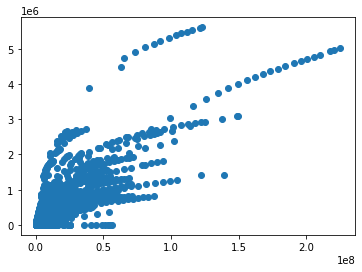

In [141]:
# Scatter betwoeen Views and Likes
plt.scatter(df.views, df.likes)

In [142]:
def sentiment_converter(a, b):
    if a == b:
        return 'Neutral'
    elif a > b:
        return 'Positive'
    else: 
        return 'Negative'